In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
df = pd.read_csv('data/Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
mall_df = df[df.columns[~df.columns.isin(['CustomerID'])]]

<AxesSubplot:>

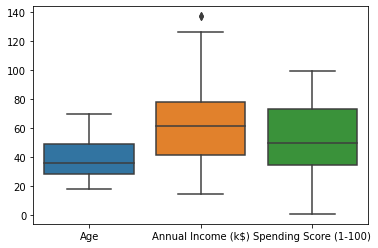

In [7]:
sns.boxplot(data=mall_df)

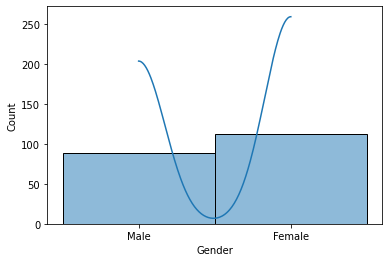

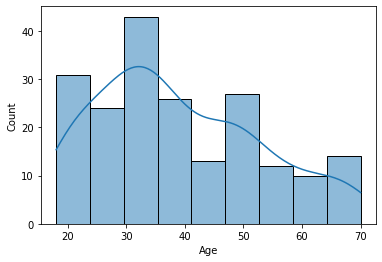

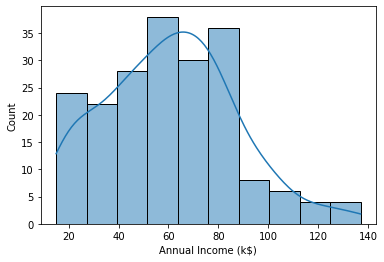

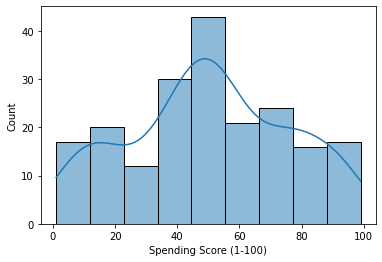

In [8]:

for col in mall_df.columns:
    plt.figure()
    sns.histplot(mall_df[col],kde=True)
    plt.show()

<AxesSubplot:>

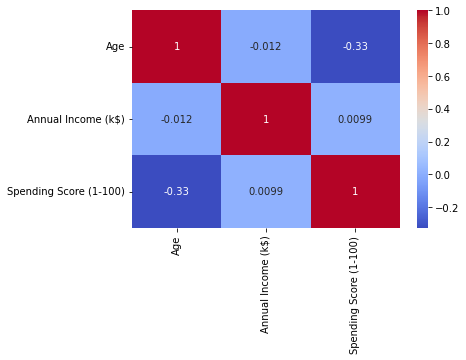

In [9]:
sns.heatmap(mall_df.corr(),annot=True,cmap='coolwarm')

In [10]:
gender = pd.get_dummies(mall_df['Gender'],drop_first=True)
gender.head()
mall_df=pd.concat([mall_df,gender],axis=1)
mall_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Male
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


In [18]:
mall_df.drop('Gender',axis=1,inplace=True)

KeyError: "['Gender'] not found in axis"

In [20]:
def try_different_clusters(K, data):
       
    cluster_values = list(range(1, K+1))
    inertias=[]
    
    for c in cluster_values:
        model = KMeans(n_clusters = c,init='k-means++',max_iter=400,random_state=42)
        model.fit(data)
        inertias.append(model.inertia_)
    
    return inertias

In [25]:
outputs = try_different_clusters(12, mall_df)
distances = pd.DataFrame({"clusters": list(range(1, 13)),"sum of squared distances": outputs})
distances

C:\Users\idhay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



,clusters,sum of squared distances
0,1,309713.180000
1,2,213653.584655
2,3,144202.333399
3,4,105220.709244
4,5,76221.621309
5,6,58793.694788
6,7,51451.545600
7,8,44359.634641
8,9,40922.683292
9,10,37358.424810


In [27]:
# Finding optimal number of clusters k
figure = go.Figure()
figure.add_trace(go.Scatter(x=distances["clusters"], y=distances["sum of squared distances"]))

figure.update_layout(xaxis = dict(tick0 = 1,dtick = 1,tickmode = 'linear'),                  
                  xaxis_title="Number of clusters",
                  yaxis_title="Sum of squared distances",
                  title_text="Finding optimal number of clusters using elbow method")
figure.show()


In [28]:
kmeans_model = KMeans(init='k-means++', n_clusters=5
                      , max_iter=400, random_state=42,verbose=1)

In [29]:
kmeans_model.fit(mall_df)

Initialization complete
Iteration 0, inertia 119403.0
Iteration 1, inertia 81385.87608278489
Iteration 2, inertia 74433.4676615221
Iteration 3, inertia 72993.95227057928
Iteration 4, inertia 72467.64845391955
Iteration 5, inertia 71757.89480210726
Iteration 6, inertia 71508.14108463847
Iteration 7, inertia 70389.16504810599
Iteration 8, inertia 66777.12737926366
Iteration 9, inertia 62609.84268811905
Iteration 10, inertia 59061.47627045254
Iteration 11, inertia 58862.181186801994
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 91086.0
Iteration 1, inertia 75683.62562995419
Iteration 2, inertia 72693.49643522852
Iteration 3, inertia 68035.03866009934
Iteration 4, inertia 62170.31337587882
Iteration 5, inertia 59634.36135789914
Iteration 6, inertia 58838.2011008097
Iteration 7, inertia 58793.69478766846
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 111686.0
Iteration 1, inertia 75719.23016704875
Iter

KMeans(max_iter=400, n_clusters=6, random_state=42, verbose=1)

In [30]:
# cluster_centers = kmeans_model.cluster_centers_
# data = np.expm1(cluster_centers)
# points = np.append(data, cluster_centers, axis=1)
# points

In [31]:
# Add "clusters" to customers data
# points = np.append(points, [[0], [1], [2], [3], [4],[5],[6],[7]], axis=1)
# print(points)
mall_df["clusters"] = kmeans_model.labels_

In [32]:
mall_df.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Male',
       'clusters'],
      dtype='object')

In [33]:
figure = px.scatter_3d(mall_df,
                    color='clusters',
                    x="Age",
                    y="Annual Income (k$)",
                    z="Spending Score (1-100)",            
                    category_orders = {"clusters": ["0", "1", "2", "3", "4","5","6","7"]}                    
                    )
figure.update_layout()
figure.show()